# IMPORTING ALL THE LIBRARIES


In [1]:
import pandas as pd
import matplotlib.pyplot as plt

import numpy as np
import matplotlib.colors as mcolors
import math
import random
import time


from sklearn.model_selection import RandomizedSearchCV , train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error , mean_absolute_error
import datetime
import operator

plt.style.use('seaborn')
%matplotlib inline




# PROCESSING THE DATASET

In [2]:
confirmed_cases = pd.read_csv("C:/Users/vivek sharma/Desktop/covid 19/time_series_covid_19_confirmed.csv")

deaths_reported = pd.read_csv("C:/Users/vivek sharma/Desktop/covid 19/time_series_covid_19_deaths.csv")

recovered_cases = pd.read_csv("C:/Users/vivek sharma/Desktop/covid 19/time_series_covid_19_recovered.csv")

In [3]:
confirmed_cases.head()

Province/State Country/Region      Lat     Long  1/22/20  1/23/20  1/24/20  \
0            NaN    Afghanistan  33.0000  65.0000        0        0        0   
1            NaN        Albania  41.1533  20.1683        0        0        0   
2            NaN        Algeria  28.0339   1.6596        0        0        0   
3            NaN        Andorra  42.5063   1.5218        0        0        0   
4            NaN         Angola -11.2027  17.8739        0        0        0   

   1/25/20  1/26/20  1/27/20  ...  5/10/20  5/11/20  5/12/20  5/13/20  \
0        0        0        0  ...     4402     4687     4963     5226   
1        0        0        0  ...      868      872      876      880   
2        0        0        0  ...     5723     5891     6067     6253   
3        0        0        0  ...      755      755      758      760   
4        0        0        0  ...       45       45       45       45   

   5/14/20  5/15/20  5/16/20  5/17/20  5/18/20  5/19/20  
0     5639     6053     6402     6664     7072     7653  
1      898      916      933      946      948      949  
2     6442     6629     6821     7019     7201     7377  
3      761      761      761      761      761      761  
4       48       48       48       48       50       52  

[5 rows x 123 columns]

In [4]:
deaths_reported.head()

Province/State Country/Region      Lat     Long  1/22/20  1/23/20  1/24/20  \
0            NaN    Afghanistan  33.0000  65.0000        0        0        0   
1            NaN        Albania  41.1533  20.1683        0        0        0   
2            NaN        Algeria  28.0339   1.6596        0        0        0   
3            NaN        Andorra  42.5063   1.5218        0        0        0   
4            NaN         Angola -11.2027  17.8739        0        0        0   

   1/25/20  1/26/20  1/27/20  ...  5/10/20  5/11/20  5/12/20  5/13/20  \
0        0        0        0  ...      120      122      127      132   
1        0        0        0  ...       31       31       31       31   
2        0        0        0  ...      502      507      515      522   
3        0        0        0  ...       48       48       48       49   
4        0        0        0  ...        2        2        2        2   

   5/14/20  5/15/20  5/16/20  5/17/20  5/18/20  5/19/20  
0      136      153      168      169      173      178  
1       31       31       31       31       31       31  
2      529      536      542      548      555      561  
3       49       49       51       51       51       51  
4        2        2        2        2        3        3  

[5 rows x 123 columns]

In [5]:
recovered_cases.head()

Province/State Country/Region      Lat     Long  1/22/20  1/23/20  1/24/20  \
0            NaN    Afghanistan  33.0000  65.0000        0        0        0   
1            NaN        Albania  41.1533  20.1683        0        0        0   
2            NaN        Algeria  28.0339   1.6596        0        0        0   
3            NaN        Andorra  42.5063   1.5218        0        0        0   
4            NaN         Angola -11.2027  17.8739        0        0        0   

   1/25/20  1/26/20  1/27/20  ...  5/10/20  5/11/20  5/12/20  5/13/20  \
0        0        0        0  ...      558      558      610      648   
1        0        0        0  ...      650      654      682      688   
2        0        0        0  ...     2678     2841     2998     3058   
3        0        0        0  ...      550      550      568      576   
4        0        0        0  ...       13       13       13       14   

   5/14/20  5/15/20  5/16/20  5/17/20  5/18/20  5/19/20  
0      691      745      745      778      801      850  
1      694      705      714      715      727      742  
2     3158     3271     3409     3507     3625     3746  
3      596      604      615      617      624      628  
4       14       17       17       17       17       17  

[5 rows x 123 columns]

In [6]:
confirmed = confirmed_cases.loc[confirmed_cases['Country/Region'] == "India"]

In [7]:
confirmed

Province/State Country/Region   Lat  Long  1/22/20  1/23/20  1/24/20  \
131            NaN          India  21.0  78.0        0        0        0   

     1/25/20  1/26/20  1/27/20  ...  5/10/20  5/11/20  5/12/20  5/13/20  \
131        0        0        0  ...    67161    70768    74292    78055   

     5/14/20  5/15/20  5/16/20  5/17/20  5/18/20  5/19/20  
131    81997    85784    90648    95698   100328   106475  

[1 rows x 123 columns]

In [8]:
deaths = deaths_reported.loc[deaths_reported['Country/Region'] == "India"]

In [9]:
deaths

Province/State Country/Region   Lat  Long  1/22/20  1/23/20  1/24/20  \
131            NaN          India  21.0  78.0        0        0        0   

     1/25/20  1/26/20  1/27/20  ...  5/10/20  5/11/20  5/12/20  5/13/20  \
131        0        0        0  ...     2212     2294     2415     2551   

     5/14/20  5/15/20  5/16/20  5/17/20  5/18/20  5/19/20  
131     2649     2753     2871     3025     3156     3302  

[1 rows x 123 columns]

In [10]:
recovered = recovered_cases.loc[recovered_cases['Country/Region'] == "India"]

In [11]:
recovered

Province/State Country/Region   Lat  Long  1/22/20  1/23/20  1/24/20  \
125            NaN          India  21.0  78.0        0        0        0   

     1/25/20  1/26/20  1/27/20  ...  5/10/20  5/11/20  5/12/20  5/13/20  \
125        0        0        0  ...    20969    22549    24420    26400   

     5/14/20  5/15/20  5/16/20  5/17/20  5/18/20  5/19/20  
125    27969    30258    34224    36795    39233    42309  

[1 rows x 123 columns]

In [12]:
confirmed = confirmed.drop(['Province/State','Lat','Long'],axis = 1)

In [13]:
deaths = deaths.drop(['Province/State','Lat','Long'],axis = 1)

In [14]:
recovered = recovered.drop(['Province/State','Lat','Long'],axis = 1)

In [15]:
confirmed = confirmed.T


In [16]:
confirmed

131
Country/Region   India
1/22/20              0
1/23/20              0
1/24/20              0
1/25/20              0
1/26/20              0
1/27/20              0
1/28/20              0
1/29/20              0
1/30/20              1
1/31/20              1
2/1/20               1
2/2/20               2
2/3/20               3
2/4/20               3
2/5/20               3
2/6/20               3
2/7/20               3
2/8/20               3
2/9/20               3
2/10/20              3
2/11/20              3
2/12/20              3
2/13/20              3
2/14/20              3
2/15/20              3
2/16/20              3
2/17/20              3
2/18/20              3
2/19/20              3
...                ...
4/20/20          18539
4/21/20          20080
4/22/20          21370
4/23/20          23077
4/24/20          24530
4/25/20          26283
4/26/20          27890
4/27/20          29451
4/28/20          31324
4/29/20          33062
4/30/20          34863
5/1/20           37257
5/2/20           39699
5/3/20           42505
5/4/20           46437
5/5/20           49400
5/6/20           52987
5/7/20           56351
5/8/20           59695
5/9/20           62808
5/10/20          67161
5/11/20          70768
5/12/20          74292
5/13/20          78055
5/14/20          81997
5/15/20          85784
5/16/20          90648
5/17/20          95698
5/18/20         100328
5/19/20         106475

[120 rows x 1 columns]

In [17]:
recovered = recovered.T

In [18]:
recovered

125
Country/Region  India
1/22/20             0
1/23/20             0
1/24/20             0
1/25/20             0
1/26/20             0
1/27/20             0
1/28/20             0
1/29/20             0
1/30/20             0
1/31/20             0
2/1/20              0
2/2/20              0
2/3/20              0
2/4/20              0
2/5/20              0
2/6/20              0
2/7/20              0
2/8/20              0
2/9/20              0
2/10/20             0
2/11/20             0
2/12/20             0
2/13/20             0
2/14/20             0
2/15/20             0
2/16/20             3
2/17/20             3
2/18/20             3
2/19/20             3
...               ...
4/20/20          3273
4/21/20          3975
4/22/20          4370
4/23/20          5012
4/24/20          5498
4/25/20          5939
4/26/20          6523
4/27/20          7137
4/28/20          7747
4/29/20          8437
4/30/20          9068
5/1/20          10007
5/2/20          10819
5/3/20          11775
5/4/20          12847
5/5/20          14142
5/6/20          15331
5/7/20          16776
5/8/20          17887
5/9/20          19301
5/10/20         20969
5/11/20         22549
5/12/20         24420
5/13/20         26400
5/14/20         27969
5/15/20         30258
5/16/20         34224
5/17/20         36795
5/18/20         39233
5/19/20         42309

[120 rows x 1 columns]

In [19]:
deaths = deaths.T

In [20]:
deaths

131
Country/Region  India
1/22/20             0
1/23/20             0
1/24/20             0
1/25/20             0
1/26/20             0
1/27/20             0
1/28/20             0
1/29/20             0
1/30/20             0
1/31/20             0
2/1/20              0
2/2/20              0
2/3/20              0
2/4/20              0
2/5/20              0
2/6/20              0
2/7/20              0
2/8/20              0
2/9/20              0
2/10/20             0
2/11/20             0
2/12/20             0
2/13/20             0
2/14/20             0
2/15/20             0
2/16/20             0
2/17/20             0
2/18/20             0
2/19/20             0
...               ...
4/20/20           592
4/21/20           645
4/22/20           681
4/23/20           721
4/24/20           780
4/25/20           825
4/26/20           881
4/27/20           939
4/28/20          1008
4/29/20          1079
4/30/20          1154
5/1/20           1223
5/2/20           1323
5/3/20           1391
5/4/20           1566
5/5/20           1693
5/6/20           1785
5/7/20           1889
5/8/20           1985
5/9/20           2101
5/10/20          2212
5/11/20          2294
5/12/20          2415
5/13/20          2551
5/14/20          2649
5/15/20          2753
5/16/20          2871
5/17/20          3025
5/18/20          3156
5/19/20          3302

[120 rows x 1 columns]

In [21]:
deaths = deaths.reset_index(drop = False)

In [22]:
deaths = deaths.drop(deaths.index[[0]])

In [23]:
deaths =deaths.rename(columns = {'index':'date'})

In [24]:
deaths =deaths.rename(columns = {131:'death'})

In [25]:
deaths

date death
1    1/22/20     0
2    1/23/20     0
3    1/24/20     0
4    1/25/20     0
5    1/26/20     0
6    1/27/20     0
7    1/28/20     0
8    1/29/20     0
9    1/30/20     0
10   1/31/20     0
11    2/1/20     0
12    2/2/20     0
13    2/3/20     0
14    2/4/20     0
15    2/5/20     0
16    2/6/20     0
17    2/7/20     0
18    2/8/20     0
19    2/9/20     0
20   2/10/20     0
21   2/11/20     0
22   2/12/20     0
23   2/13/20     0
24   2/14/20     0
25   2/15/20     0
26   2/16/20     0
27   2/17/20     0
28   2/18/20     0
29   2/19/20     0
30   2/20/20     0
..       ...   ...
90   4/20/20   592
91   4/21/20   645
92   4/22/20   681
93   4/23/20   721
94   4/24/20   780
95   4/25/20   825
96   4/26/20   881
97   4/27/20   939
98   4/28/20  1008
99   4/29/20  1079
100  4/30/20  1154
101   5/1/20  1223
102   5/2/20  1323
103   5/3/20  1391
104   5/4/20  1566
105   5/5/20  1693
106   5/6/20  1785
107   5/7/20  1889
108   5/8/20  1985
109   5/9/20  2101
110  5/10/20  2212
111  5/11/20  2294
112  5/12/20  2415
113  5/13/20  2551
114  5/14/20  2649
115  5/15/20  2753
116  5/16/20  2871
117  5/17/20  3025
118  5/18/20  3156
119  5/19/20  3302

[119 rows x 2 columns]

In [26]:
confirmed = confirmed.reset_index(drop = False)

In [27]:
confirmed = confirmed.drop(confirmed.index[[0]])

In [28]:
confirmed = confirmed.rename(columns = {'index':'date'})

In [29]:
confirmed = confirmed.rename(columns = {131:'confirm'})

In [30]:
confirmed

date confirm
1    1/22/20       0
2    1/23/20       0
3    1/24/20       0
4    1/25/20       0
5    1/26/20       0
6    1/27/20       0
7    1/28/20       0
8    1/29/20       0
9    1/30/20       1
10   1/31/20       1
11    2/1/20       1
12    2/2/20       2
13    2/3/20       3
14    2/4/20       3
15    2/5/20       3
16    2/6/20       3
17    2/7/20       3
18    2/8/20       3
19    2/9/20       3
20   2/10/20       3
21   2/11/20       3
22   2/12/20       3
23   2/13/20       3
24   2/14/20       3
25   2/15/20       3
26   2/16/20       3
27   2/17/20       3
28   2/18/20       3
29   2/19/20       3
30   2/20/20       3
..       ...     ...
90   4/20/20   18539
91   4/21/20   20080
92   4/22/20   21370
93   4/23/20   23077
94   4/24/20   24530
95   4/25/20   26283
96   4/26/20   27890
97   4/27/20   29451
98   4/28/20   31324
99   4/29/20   33062
100  4/30/20   34863
101   5/1/20   37257
102   5/2/20   39699
103   5/3/20   42505
104   5/4/20   46437
105   5/5/20   49400
106   5/6/20   52987
107   5/7/20   56351
108   5/8/20   59695
109   5/9/20   62808
110  5/10/20   67161
111  5/11/20   70768
112  5/12/20   74292
113  5/13/20   78055
114  5/14/20   81997
115  5/15/20   85784
116  5/16/20   90648
117  5/17/20   95698
118  5/18/20  100328
119  5/19/20  106475

[119 rows x 2 columns]

In [31]:
c = confirmed.copy()

In [32]:
recovered = recovered.reset_index(drop = False)

In [33]:
recovered = recovered.drop(recovered.index[[0]])

In [34]:
recovered = recovered.rename(columns = {'index':'date'})

In [35]:
recovered = recovered.rename(columns = {125:'recover'})

In [36]:
recovered

date recover
1    1/22/20       0
2    1/23/20       0
3    1/24/20       0
4    1/25/20       0
5    1/26/20       0
6    1/27/20       0
7    1/28/20       0
8    1/29/20       0
9    1/30/20       0
10   1/31/20       0
11    2/1/20       0
12    2/2/20       0
13    2/3/20       0
14    2/4/20       0
15    2/5/20       0
16    2/6/20       0
17    2/7/20       0
18    2/8/20       0
19    2/9/20       0
20   2/10/20       0
21   2/11/20       0
22   2/12/20       0
23   2/13/20       0
24   2/14/20       0
25   2/15/20       0
26   2/16/20       3
27   2/17/20       3
28   2/18/20       3
29   2/19/20       3
30   2/20/20       3
..       ...     ...
90   4/20/20    3273
91   4/21/20    3975
92   4/22/20    4370
93   4/23/20    5012
94   4/24/20    5498
95   4/25/20    5939
96   4/26/20    6523
97   4/27/20    7137
98   4/28/20    7747
99   4/29/20    8437
100  4/30/20    9068
101   5/1/20   10007
102   5/2/20   10819
103   5/3/20   11775
104   5/4/20   12847
105   5/5/20   14142
106   5/6/20   15331
107   5/7/20   16776
108   5/8/20   17887
109   5/9/20   19301
110  5/10/20   20969
111  5/11/20   22549
112  5/12/20   24420
113  5/13/20   26400
114  5/14/20   27969
115  5/15/20   30258
116  5/16/20   34224
117  5/17/20   36795
118  5/18/20   39233
119  5/19/20   42309

[119 rows x 2 columns]

In [37]:
dataset0 = pd.merge(confirmed , deaths , on = 'date'  )

In [38]:
dataset0

date confirm death
0    1/22/20       0     0
1    1/23/20       0     0
2    1/24/20       0     0
3    1/25/20       0     0
4    1/26/20       0     0
5    1/27/20       0     0
6    1/28/20       0     0
7    1/29/20       0     0
8    1/30/20       1     0
9    1/31/20       1     0
10    2/1/20       1     0
11    2/2/20       2     0
12    2/3/20       3     0
13    2/4/20       3     0
14    2/5/20       3     0
15    2/6/20       3     0
16    2/7/20       3     0
17    2/8/20       3     0
18    2/9/20       3     0
19   2/10/20       3     0
20   2/11/20       3     0
21   2/12/20       3     0
22   2/13/20       3     0
23   2/14/20       3     0
24   2/15/20       3     0
25   2/16/20       3     0
26   2/17/20       3     0
27   2/18/20       3     0
28   2/19/20       3     0
29   2/20/20       3     0
..       ...     ...   ...
89   4/20/20   18539   592
90   4/21/20   20080   645
91   4/22/20   21370   681
92   4/23/20   23077   721
93   4/24/20   24530   780
94   4/25/20   26283   825
95   4/26/20   27890   881
96   4/27/20   29451   939
97   4/28/20   31324  1008
98   4/29/20   33062  1079
99   4/30/20   34863  1154
100   5/1/20   37257  1223
101   5/2/20   39699  1323
102   5/3/20   42505  1391
103   5/4/20   46437  1566
104   5/5/20   49400  1693
105   5/6/20   52987  1785
106   5/7/20   56351  1889
107   5/8/20   59695  1985
108   5/9/20   62808  2101
109  5/10/20   67161  2212
110  5/11/20   70768  2294
111  5/12/20   74292  2415
112  5/13/20   78055  2551
113  5/14/20   81997  2649
114  5/15/20   85784  2753
115  5/16/20   90648  2871
116  5/17/20   95698  3025
117  5/18/20  100328  3156
118  5/19/20  106475  3302

[119 rows x 3 columns]

In [39]:
dataset = pd.merge(dataset0, recovered , on = 'date'  )

In [40]:
#FINAL DATASET
dataset

date confirm death recover
0    1/22/20       0     0       0
1    1/23/20       0     0       0
2    1/24/20       0     0       0
3    1/25/20       0     0       0
4    1/26/20       0     0       0
5    1/27/20       0     0       0
6    1/28/20       0     0       0
7    1/29/20       0     0       0
8    1/30/20       1     0       0
9    1/31/20       1     0       0
10    2/1/20       1     0       0
11    2/2/20       2     0       0
12    2/3/20       3     0       0
13    2/4/20       3     0       0
14    2/5/20       3     0       0
15    2/6/20       3     0       0
16    2/7/20       3     0       0
17    2/8/20       3     0       0
18    2/9/20       3     0       0
19   2/10/20       3     0       0
20   2/11/20       3     0       0
21   2/12/20       3     0       0
22   2/13/20       3     0       0
23   2/14/20       3     0       0
24   2/15/20       3     0       0
25   2/16/20       3     0       3
26   2/17/20       3     0       3
27   2/18/20       3     0       3
28   2/19/20       3     0       3
29   2/20/20       3     0       3
..       ...     ...   ...     ...
89   4/20/20   18539   592    3273
90   4/21/20   20080   645    3975
91   4/22/20   21370   681    4370
92   4/23/20   23077   721    5012
93   4/24/20   24530   780    5498
94   4/25/20   26283   825    5939
95   4/26/20   27890   881    6523
96   4/27/20   29451   939    7137
97   4/28/20   31324  1008    7747
98   4/29/20   33062  1079    8437
99   4/30/20   34863  1154    9068
100   5/1/20   37257  1223   10007
101   5/2/20   39699  1323   10819
102   5/3/20   42505  1391   11775
103   5/4/20   46437  1566   12847
104   5/5/20   49400  1693   14142
105   5/6/20   52987  1785   15331
106   5/7/20   56351  1889   16776
107   5/8/20   59695  1985   17887
108   5/9/20   62808  2101   19301
109  5/10/20   67161  2212   20969
110  5/11/20   70768  2294   22549
111  5/12/20   74292  2415   24420
112  5/13/20   78055  2551   26400
113  5/14/20   81997  2649   27969
114  5/15/20   85784  2753   30258
115  5/16/20   90648  2871   34224
116  5/17/20   95698  3025   36795
117  5/18/20  100328  3156   39233
118  5/19/20  106475  3302   42309

[119 rows x 4 columns]

# VISUALIZING THE CURRENT DATASET

In [41]:
import plotly.graph_objects as go


In [42]:

fig = go.Figure()
#Plotting datewise cases
fig.add_trace(go.Scatter(x=dataset['date'], y=dataset['confirm'], mode='lines+markers', name='confirm',line=dict(color='blue', width=2)))
fig.add_trace(go.Scatter(x=dataset['date'], y=dataset['death'], mode='lines+markers', name='death', line=dict(color='Red', width=2)))
fig.add_trace(go.Scatter(x=dataset['date'], y=dataset['recover'], mode='lines+markers', name='recover', line=dict(color='Green', width=2)))
fig.update_layout(title='INDIA COVID-19 Cases', xaxis_tickfont_size=14,yaxis=dict(title='Number of Cases'))

fig.show()

In [43]:
dataset.tail()

date confirm death recover
114  5/15/20   85784  2753   30258
115  5/16/20   90648  2871   34224
116  5/17/20   95698  3025   36795
117  5/18/20  100328  3156   39233
118  5/19/20  106475  3302   42309

In [44]:
confirmed.tail()

date confirm
115  5/15/20   85784
116  5/16/20   90648
117  5/17/20   95698
118  5/18/20  100328
119  5/19/20  106475

# SVR ON CONFIRMED CASES

In [45]:
import datetime as dt

confirmed['date'] = pd.to_datetime(confirmed['date'])
confirmed['date'] = confirmed['date'].map(dt.datetime.toordinal)

In [46]:
X = confirmed.date
Y = confirmed.confirm

In [47]:
X = X.values.reshape(-1,1)
Y = Y.values.reshape(-1,1)

In [48]:
X.shape

(119, 1)

In [49]:
Y.shape

(119, 1)

In [50]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
sc_y = StandardScaler()
x = sc_x.fit_transform(X)
y = sc_y.fit_transform(Y)

C:\Users\vivek sharma\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning:

Data with input dtype int64 was converted to float64 by StandardScaler.

C:\Users\vivek sharma\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning:

Data with input dtype int64 was converted to float64 by StandardScaler.

C:\Users\vivek sharma\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning:

Data with input dtype object was converted to float64 by StandardScaler.

C:\Users\vivek sharma\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning:

Data with input dtype object was converted to float64 by StandardScaler.



In [51]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(x, y)

C:\Users\vivek sharma\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
  gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
  tol=0.001, verbose=False)

In [52]:
y_pred = regressor.predict(x)

In [53]:
y_pred

array([-0.46725575, -0.47580141, -0.48333155, -0.48987354, -0.49546085,
       -0.50013258, -0.50393303, -0.50691112, -0.50911979, -0.51061538,
       -0.51145695, -0.51170556, -0.51142356, -0.51067388, -0.50951927,
       -0.50802165, -0.50624138, -0.50423662, -0.50206275, -0.49977179,
       -0.49741193, -0.49502711, -0.49265669, -0.49033513, -0.48809189,
       -0.48595128, -0.4839325 , -0.48204969, -0.48031211, -0.47872441,
       -0.47728694, -0.47599617, -0.47484512, -0.4738239 , -0.47292027,
       -0.4721202 , -0.47140851, -0.47076942, -0.47018722, -0.46964678,
       -0.4691341 , -0.46863683, -0.46814462, -0.46764948, -0.46714605,
       -0.46663169, -0.46610655, -0.46557347, -0.46503774, -0.46450681,
       -0.46398977, -0.46349679, -0.46303841, -0.46262469, -0.46226428,
       -0.46196341, -0.46172477, -0.46154633, -0.46142019, -0.4613313 ,
       -0.46125625, -0.4611621 , -0.46100522, -0.46073023, -0.46026906,
       -0.45954013, -0.45844769, -0.45688134, -0.45471574, -0.45

In [54]:
 y


array([[-0.5670158 ],
       [-0.5670158 ],
       [-0.5670158 ],
       [-0.5670158 ],
       [-0.5670158 ],
       [-0.5670158 ],
       [-0.5670158 ],
       [-0.5670158 ],
       [-0.56697738],
       [-0.56697738],
       [-0.56697738],
       [-0.56693896],
       [-0.56690054],
       [-0.56690054],
       [-0.56690054],
       [-0.56690054],
       [-0.56690054],
       [-0.56690054],
       [-0.56690054],
       [-0.56690054],
       [-0.56690054],
       [-0.56690054],
       [-0.56690054],
       [-0.56690054],
       [-0.56690054],
       [-0.56690054],
       [-0.56690054],
       [-0.56690054],
       [-0.56690054],
       [-0.56690054],
       [-0.56690054],
       [-0.56690054],
       [-0.56690054],
       [-0.56690054],
       [-0.56690054],
       [-0.56690054],
       [-0.56690054],
       [-0.56690054],
       [-0.56690054],
       [-0.56690054],
       [-0.5668237 ],
       [-0.5668237 ],
       [-0.56594007],
       [-0.56586323],
       [-0.56582481],
       [-0

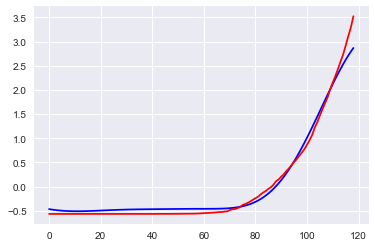

In [55]:
plt.plot(y_pred,color = 'blue')
plt.plot(y,color = 'red')

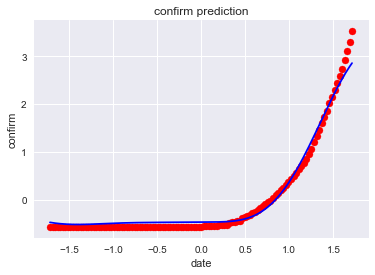

In [56]:
X_grid = np.arange(min(x), max(x), 0.01) #this step required because data is feature scaled.
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(x, y, color = 'red')
plt.plot(X_grid, regressor.predict(X_grid), color = 'blue')
plt.title('confirm prediction')
plt.xlabel('date')
plt.ylabel('confirm')
plt.show()

In [57]:
regressor.score(y,y_pred)

0.7078681845111587

In [58]:
mean_squared_error(y, y_pred)

0.014785675900311624

In [59]:
regressor.score(X_grid, regressor.predict(X_grid))

1.0

In [60]:
regressor.score(x,y)

0.9852143240996883

 # SVR ON DEATHS DATASET
 

In [61]:
deaths

date death
1    1/22/20     0
2    1/23/20     0
3    1/24/20     0
4    1/25/20     0
5    1/26/20     0
6    1/27/20     0
7    1/28/20     0
8    1/29/20     0
9    1/30/20     0
10   1/31/20     0
11    2/1/20     0
12    2/2/20     0
13    2/3/20     0
14    2/4/20     0
15    2/5/20     0
16    2/6/20     0
17    2/7/20     0
18    2/8/20     0
19    2/9/20     0
20   2/10/20     0
21   2/11/20     0
22   2/12/20     0
23   2/13/20     0
24   2/14/20     0
25   2/15/20     0
26   2/16/20     0
27   2/17/20     0
28   2/18/20     0
29   2/19/20     0
30   2/20/20     0
..       ...   ...
90   4/20/20   592
91   4/21/20   645
92   4/22/20   681
93   4/23/20   721
94   4/24/20   780
95   4/25/20   825
96   4/26/20   881
97   4/27/20   939
98   4/28/20  1008
99   4/29/20  1079
100  4/30/20  1154
101   5/1/20  1223
102   5/2/20  1323
103   5/3/20  1391
104   5/4/20  1566
105   5/5/20  1693
106   5/6/20  1785
107   5/7/20  1889
108   5/8/20  1985
109   5/9/20  2101
110  5/10/20  2212
111  5/11/20  2294
112  5/12/20  2415
113  5/13/20  2551
114  5/14/20  2649
115  5/15/20  2753
116  5/16/20  2871
117  5/17/20  3025
118  5/18/20  3156
119  5/19/20  3302

[119 rows x 2 columns]

In [62]:
import datetime as dt

deaths['date'] = pd.to_datetime(deaths['date'])
deaths['date'] = deaths['date'].map(dt.datetime.toordinal)

In [63]:
X1 = deaths.date
Y1 = deaths.death

In [64]:
X1 = X1.values.reshape(-1,1)
Y1 = Y1.values.reshape(-1,1)

In [65]:
X1.shape

(119, 1)

In [66]:
Y1.shape

(119, 1)

In [67]:
#from sklearn.preprocessing import StandardScaler
sc_x1 = StandardScaler()
sc_y1 = StandardScaler()
x1 = sc_x1.fit_transform(X1)
y1 = sc_y1.fit_transform(Y1)

C:\Users\vivek sharma\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning:

Data with input dtype int64 was converted to float64 by StandardScaler.

C:\Users\vivek sharma\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning:

Data with input dtype int64 was converted to float64 by StandardScaler.

C:\Users\vivek sharma\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning:

Data with input dtype object was converted to float64 by StandardScaler.

C:\Users\vivek sharma\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning:

Data with input dtype object was converted to float64 by StandardScaler.



In [68]:
from sklearn.svm import SVR
regressor1 = SVR(kernel = 'rbf')
regressor1.fit(x1, y1)

C:\Users\vivek sharma\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
  gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
  tol=0.001, verbose=False)

In [69]:
y_pred1 = regressor1.predict(x1)

In [70]:
y_pred1

array([-0.46882451, -0.47713734, -0.48439946, -0.49063984, -0.49589394,
       -0.50020332, -0.50361512, -0.50618155, -0.50795924, -0.50900859,
       -0.50939308, -0.50917852, -0.50843229, -0.5072226 , -0.50561764,
       -0.5036849 , -0.50149035, -0.49909777, -0.49656803, -0.4939585 ,
       -0.49132245, -0.48870857, -0.48616051, -0.48371658, -0.48140947,
       -0.47926608, -0.47730748, -0.47554888, -0.47399983, -0.47266435,
       -0.47154128, -0.47062467, -0.46990421, -0.46936577, -0.46899198,
       -0.46876288, -0.46865655, -0.46864982, -0.46871893, -0.46884019,
       -0.46899068, -0.46914879, -0.46929479, -0.46941131, -0.4694837 ,
       -0.46950034, -0.46945277, -0.46933578, -0.46914729, -0.46888817,
       -0.46856184, -0.46817381, -0.46773102, -0.46724109, -0.46671141,
       -0.46614817, -0.4655552 , -0.46493284, -0.46427665, -0.46357613,
       -0.46281345, -0.46196207, -0.46098559, -0.45983646, -0.45845493,
       -0.45676806, -0.45468893, -0.45211595, -0.44893246, -0.44

In [71]:
y1

array([[-0.56869276],
       [-0.56869276],
       [-0.56869276],
       [-0.56869276],
       [-0.56869276],
       [-0.56869276],
       [-0.56869276],
       [-0.56869276],
       [-0.56869276],
       [-0.56869276],
       [-0.56869276],
       [-0.56869276],
       [-0.56869276],
       [-0.56869276],
       [-0.56869276],
       [-0.56869276],
       [-0.56869276],
       [-0.56869276],
       [-0.56869276],
       [-0.56869276],
       [-0.56869276],
       [-0.56869276],
       [-0.56869276],
       [-0.56869276],
       [-0.56869276],
       [-0.56869276],
       [-0.56869276],
       [-0.56869276],
       [-0.56869276],
       [-0.56869276],
       [-0.56869276],
       [-0.56869276],
       [-0.56869276],
       [-0.56869276],
       [-0.56869276],
       [-0.56869276],
       [-0.56869276],
       [-0.56869276],
       [-0.56869276],
       [-0.56869276],
       [-0.56869276],
       [-0.56869276],
       [-0.56869276],
       [-0.56869276],
       [-0.56869276],
       [-0

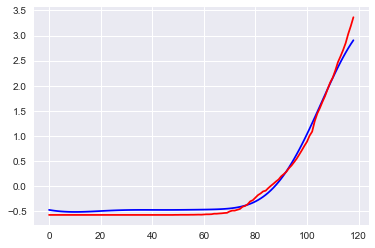

In [72]:
plt.plot(y_pred1,color = 'blue')
plt.plot(y1,color = 'red')

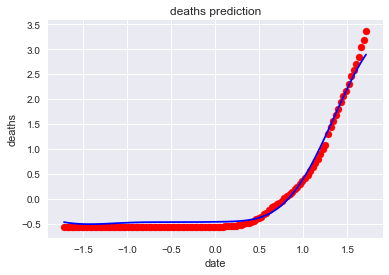

In [73]:
X_grid1 = np.arange(min(x1), max(x1), 0.01) #this step required because data is feature scaled.
X_grid1 = X_grid1.reshape((len(X_grid1), 1))
plt.scatter(x1, y1, color = 'red')
plt.plot(X_grid1, regressor1.predict(X_grid1), color = 'blue')
plt.title('deaths prediction')
plt.xlabel('date')
plt.ylabel('deaths')
plt.show()

In [74]:
regressor1.score(y1,y_pred1)

0.7123229387592757

In [75]:
mean_squared_error(y1, y_pred1)

0.010779314872569378

In [76]:
regressor1.score(X_grid1, regressor1.predict(X_grid1))

1.0

In [77]:
regressor1.score(x1,y1)

0.9892206851274307

# SVR ON RECOVERED DATASET

In [78]:
recovered.tail()

date recover
115  5/15/20   30258
116  5/16/20   34224
117  5/17/20   36795
118  5/18/20   39233
119  5/19/20   42309

In [79]:
import datetime as dt

recovered['date'] = pd.to_datetime(recovered['date'])
recovered['date'] = recovered['date'].map(dt.datetime.toordinal)

In [80]:
X2 = recovered.date
Y2 = recovered.recover

In [81]:
X2 = X2.values.reshape(-1,1)
Y2 = Y2.values.reshape(-1,1)

In [82]:
X2.shape

(119, 1)

In [83]:
Y2.shape

(119, 1)

In [84]:
sc_x2 = StandardScaler()
sc_y2 = StandardScaler()
x2 = sc_x2.fit_transform(X2)
y2 = sc_y2.fit_transform(Y2)

C:\Users\vivek sharma\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning:

Data with input dtype int64 was converted to float64 by StandardScaler.

C:\Users\vivek sharma\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning:

Data with input dtype int64 was converted to float64 by StandardScaler.

C:\Users\vivek sharma\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning:

Data with input dtype object was converted to float64 by StandardScaler.

C:\Users\vivek sharma\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning:

Data with input dtype object was converted to float64 by StandardScaler.



In [85]:
from sklearn.svm import SVR
regressor2 = SVR(kernel = 'rbf')
regressor2.fit(x2, y2)

C:\Users\vivek sharma\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
  gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
  tol=0.001, verbose=False)

In [86]:
y_pred2 = regressor2.predict(x2)

In [87]:
y_pred2

array([-0.37902575, -0.38756482, -0.3951976 , -0.40194922, -0.4078501 ,
       -0.41293545, -0.41724487, -0.4208217 , -0.42371255, -0.42596657,
       -0.42763489, -0.42876988, -0.42942452, -0.42965172, -0.42950361,
       -0.42903099, -0.42828264, -0.42730482, -0.42614074, -0.42483013,
       -0.42340885, -0.42190863, -0.42035686, -0.41877644, -0.4171858 ,
       -0.41559897, -0.41402568, -0.41247173, -0.41093923, -0.4094271 ,
       -0.40793155, -0.40644667, -0.40496503, -0.4034784 , -0.40197843,
       -0.40045739, -0.39890887, -0.39732855, -0.39571479, -0.39406933,
       -0.39239784, -0.39071035, -0.38902167, -0.38735164, -0.38572526,
       -0.38417266, -0.38272897, -0.38143395, -0.38033154, -0.3794692 ,
       -0.37889705, -0.37866692, -0.37883118, -0.37944147, -0.38054723,
       -0.38219422, -0.38442283, -0.3872664 , -0.39074946, -0.39488593,
       -0.39967741, -0.4051114 , -0.41115974, -0.41777701, -0.4248992 ,
       -0.4324425 , -0.44030235, -0.44835266, -0.45644538, -0.46

In [88]:
y2

array([[-4.79249623e-01],
       [-4.79249623e-01],
       [-4.79249623e-01],
       [-4.79249623e-01],
       [-4.79249623e-01],
       [-4.79249623e-01],
       [-4.79249623e-01],
       [-4.79249623e-01],
       [-4.79249623e-01],
       [-4.79249623e-01],
       [-4.79249623e-01],
       [-4.79249623e-01],
       [-4.79249623e-01],
       [-4.79249623e-01],
       [-4.79249623e-01],
       [-4.79249623e-01],
       [-4.79249623e-01],
       [-4.79249623e-01],
       [-4.79249623e-01],
       [-4.79249623e-01],
       [-4.79249623e-01],
       [-4.79249623e-01],
       [-4.79249623e-01],
       [-4.79249623e-01],
       [-4.79249623e-01],
       [-4.78921031e-01],
       [-4.78921031e-01],
       [-4.78921031e-01],
       [-4.78921031e-01],
       [-4.78921031e-01],
       [-4.78921031e-01],
       [-4.78921031e-01],
       [-4.78921031e-01],
       [-4.78921031e-01],
       [-4.78921031e-01],
       [-4.78921031e-01],
       [-4.78921031e-01],
       [-4.78921031e-01],
       [-4.7

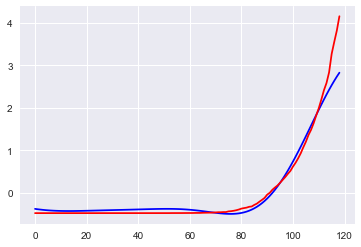

In [89]:
plt.plot(y_pred2,color = 'blue')
plt.plot(y2,color = 'red')

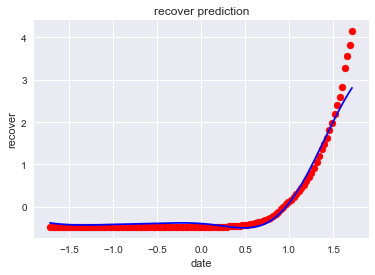

In [90]:
X_grid2 = np.arange(min(x2), max(x2), 0.01) #this step required because data is feature scaled.
X_grid2 = X_grid2.reshape((len(X_grid2), 1))
plt.scatter(x2, y2, color = 'red')
plt.plot(X_grid2, regressor2.predict(X_grid2), color = 'blue')
plt.title('recover prediction')
plt.xlabel('date')
plt.ylabel('recover')
plt.show()

In [91]:
regressor2.score(y2,y_pred2)

0.6062214792276627

In [92]:
mean_squared_error(y2, y_pred2)

0.044548354117092265

In [93]:
regressor2.score(X_grid2, regressor2.predict(X_grid2))

1.0

In [94]:
regressor2.score(x2,y2)

0.9554516458829078

   # TIME - SERIES FORECASTING
   #USING THE DICKEY FULLER TEST AND THE ARIMA MODEL

In [95]:
from matplotlib.pylab import rcParams

In [96]:
rcParams["figure.figsize"] = 10,6

In [97]:
c

date confirm
1    1/22/20       0
2    1/23/20       0
3    1/24/20       0
4    1/25/20       0
5    1/26/20       0
6    1/27/20       0
7    1/28/20       0
8    1/29/20       0
9    1/30/20       1
10   1/31/20       1
11    2/1/20       1
12    2/2/20       2
13    2/3/20       3
14    2/4/20       3
15    2/5/20       3
16    2/6/20       3
17    2/7/20       3
18    2/8/20       3
19    2/9/20       3
20   2/10/20       3
21   2/11/20       3
22   2/12/20       3
23   2/13/20       3
24   2/14/20       3
25   2/15/20       3
26   2/16/20       3
27   2/17/20       3
28   2/18/20       3
29   2/19/20       3
30   2/20/20       3
..       ...     ...
90   4/20/20   18539
91   4/21/20   20080
92   4/22/20   21370
93   4/23/20   23077
94   4/24/20   24530
95   4/25/20   26283
96   4/26/20   27890
97   4/27/20   29451
98   4/28/20   31324
99   4/29/20   33062
100  4/30/20   34863
101   5/1/20   37257
102   5/2/20   39699
103   5/3/20   42505
104   5/4/20   46437
105   5/5/20   49400
106   5/6/20   52987
107   5/7/20   56351
108   5/8/20   59695
109   5/9/20   62808
110  5/10/20   67161
111  5/11/20   70768
112  5/12/20   74292
113  5/13/20   78055
114  5/14/20   81997
115  5/15/20   85784
116  5/16/20   90648
117  5/17/20   95698
118  5/18/20  100328
119  5/19/20  106475

[119 rows x 2 columns]

In [98]:
c['date'] = pd.to_datetime(c['date'] , infer_datetime_format= True)
indexed_confirmed = c.set_index(["date"])

In [99]:
from datetime import datetime
indexed_confirmed

confirm
date              
2020-01-22       0
2020-01-23       0
2020-01-24       0
2020-01-25       0
2020-01-26       0
2020-01-27       0
2020-01-28       0
2020-01-29       0
2020-01-30       1
2020-01-31       1
2020-02-01       1
2020-02-02       2
2020-02-03       3
2020-02-04       3
2020-02-05       3
2020-02-06       3
2020-02-07       3
2020-02-08       3
2020-02-09       3
2020-02-10       3
2020-02-11       3
2020-02-12       3
2020-02-13       3
2020-02-14       3
2020-02-15       3
2020-02-16       3
2020-02-17       3
2020-02-18       3
2020-02-19       3
2020-02-20       3
...            ...
2020-04-20   18539
2020-04-21   20080
2020-04-22   21370
2020-04-23   23077
2020-04-24   24530
2020-04-25   26283
2020-04-26   27890
2020-04-27   29451
2020-04-28   31324
2020-04-29   33062
2020-04-30   34863
2020-05-01   37257
2020-05-02   39699
2020-05-03   42505
2020-05-04   46437
2020-05-05   49400
2020-05-06   52987
2020-05-07   56351
2020-05-08   59695
2020-05-09   62808
2020-05-10   67161
2020-05-11   70768
2020-05-12   74292
2020-05-13   78055
2020-05-14   81997
2020-05-15   85784
2020-05-16   90648
2020-05-17   95698
2020-05-18  100328
2020-05-19  106475

[119 rows x 1 columns]

C:\Users\vivek sharma\Anaconda3\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning:

Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()



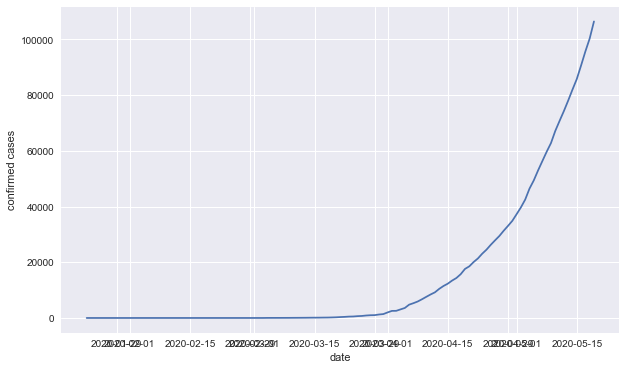

In [100]:
plt.xlabel("date")
plt.ylabel("confirmed cases")
plt.plot(indexed_confirmed)


In [101]:
#DETERMINING THE ROLLING STATITICS
rolmean = indexed_confirmed.rolling(window =12 ).mean()
rolstd = indexed_confirmed.rolling(window =12 ).std()

In [102]:
print(rolmean)
print(rolstd)

                 confirm
date                    
2020-01-22           NaN
2020-01-23           NaN
2020-01-24           NaN
2020-01-25           NaN
2020-01-26           NaN
2020-01-27           NaN
2020-01-28           NaN
2020-01-29           NaN
2020-01-30           NaN
2020-01-31           NaN
2020-02-01           NaN
2020-02-02      0.416667
2020-02-03      0.666667
2020-02-04      0.916667
2020-02-05      1.166667
2020-02-06      1.416667
2020-02-07      1.666667
2020-02-08      1.916667
2020-02-09      2.166667
2020-02-10      2.416667
2020-02-11      2.583333
2020-02-12      2.750000
2020-02-13      2.916667
2020-02-14      3.000000
2020-02-15      3.000000
2020-02-16      3.000000
2020-02-17      3.000000
2020-02-18      3.000000
2020-02-19      3.000000
2020-02-20      3.000000
...                  ...
2020-04-20  12157.833333
2020-04-21  13270.750000
2020-04-22  14418.416667
2020-04-23  15637.666667
2020-04-24  16914.750000
2020-04-25  18233.916667
2020-04-26  19600.833333


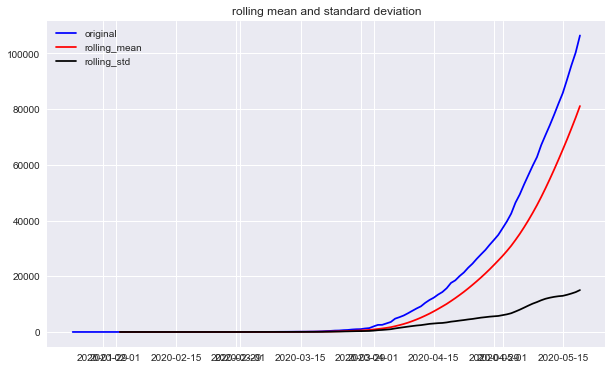

In [103]:
#PLOTTING ROLLING STATISTICS

orig = plt.plot(indexed_confirmed,color = 'blue',label = 'original')
mean = plt.plot(rolmean,color = 'red',label = 'rolling_mean')
std = plt.plot(rolstd,color = 'black',label = 'rolling_std')
plt.legend(loc = 'best')
plt.title("rolling mean and standard deviation")
plt.show(block = False)

In [104]:
#PERFORM DICKEY -FULLER TEST

from statsmodels.tsa.stattools import adfuller
print("result of dickey fuller test : ")
df_test = adfuller(indexed_confirmed['confirm'],autolag="AIC")
df_output = pd.Series(df_test[0:4],index = ["test statistic","p - value","lag used","number of obs used"])
for key,value in df_test[4].items():
    df_output["critical value (%s)" %key] = value
print (df_output)

result of dickey fuller test : 
test statistic           -0.730754
p - value                 0.838622
lag used                 13.000000
number of obs used      105.000000
critical value (1%)      -3.494220
critical value (5%)      -2.889485
critical value (10%)     -2.581676
dtype: float64


In [105]:
co = indexed_confirmed['confirm'].tolist()
co = np.log(co)
co

C:\Users\vivek sharma\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning:

divide by zero encountered in log



array([       -inf,        -inf,        -inf,        -inf,        -inf,
              -inf,        -inf,        -inf,  0.        ,  0.        ,
        0.        ,  0.69314718,  1.09861229,  1.09861229,  1.09861229,
        1.09861229,  1.09861229,  1.09861229,  1.09861229,  1.09861229,
        1.09861229,  1.09861229,  1.09861229,  1.09861229,  1.09861229,
        1.09861229,  1.09861229,  1.09861229,  1.09861229,  1.09861229,
        1.09861229,  1.09861229,  1.09861229,  1.09861229,  1.09861229,
        1.09861229,  1.09861229,  1.09861229,  1.09861229,  1.09861229,
        1.60943791,  1.60943791,  3.33220451,  3.40119738,  3.4339872 ,
        3.52636052,  3.66356165,  3.76120012,  4.02535169,  4.12713439,
        4.29045944,  4.40671925,  4.62497281,  4.72738782,  4.77912349,
        4.95582706,  5.04985601,  5.26785816,  5.49716823,  5.79909265,
        5.98141421,  6.2126061 ,  6.28413416,  6.48768402,  6.58892648,
        6.78784498,  6.89467004,  6.93147181,  7.13169851,  7.24

In [106]:
df = pd.DataFrame({'confirms':co})

In [107]:
df

confirms
0         -inf
1         -inf
2         -inf
3         -inf
4         -inf
5         -inf
6         -inf
7         -inf
8     0.000000
9     0.000000
10    0.000000
11    0.693147
12    1.098612
13    1.098612
14    1.098612
15    1.098612
16    1.098612
17    1.098612
18    1.098612
19    1.098612
20    1.098612
21    1.098612
22    1.098612
23    1.098612
24    1.098612
25    1.098612
26    1.098612
27    1.098612
28    1.098612
29    1.098612
..         ...
89    9.827632
90    9.907480
91    9.969743
92   10.046592
93   10.107652
94   10.176678
95   10.236023
96   10.290483
97   10.352140
98   10.406140
99   10.459181
100  10.525595
101  10.589081
102  10.657377
103  10.745852
104  10.807706
105  10.877802
106  10.939355
107  10.997004
108  11.047838
109  11.114848
110  11.167162
111  11.215759
112  11.265169
113  11.314438
114  11.359588
115  11.414739
116  11.468953
117  11.516200
118  11.575665

[119 rows x 1 columns]

In [108]:
df['temp']  =1 

In [109]:
c['temp'] = 1

In [110]:
df

confirms  temp
0         -inf     1
1         -inf     1
2         -inf     1
3         -inf     1
4         -inf     1
5         -inf     1
6         -inf     1
7         -inf     1
8     0.000000     1
9     0.000000     1
10    0.000000     1
11    0.693147     1
12    1.098612     1
13    1.098612     1
14    1.098612     1
15    1.098612     1
16    1.098612     1
17    1.098612     1
18    1.098612     1
19    1.098612     1
20    1.098612     1
21    1.098612     1
22    1.098612     1
23    1.098612     1
24    1.098612     1
25    1.098612     1
26    1.098612     1
27    1.098612     1
28    1.098612     1
29    1.098612     1
..         ...   ...
89    9.827632     1
90    9.907480     1
91    9.969743     1
92   10.046592     1
93   10.107652     1
94   10.176678     1
95   10.236023     1
96   10.290483     1
97   10.352140     1
98   10.406140     1
99   10.459181     1
100  10.525595     1
101  10.589081     1
102  10.657377     1
103  10.745852     1
104  10.807706     1
105  10.877802     1
106  10.939355     1
107  10.997004     1
108  11.047838     1
109  11.114848     1
110  11.167162     1
111  11.215759     1
112  11.265169     1
113  11.314438     1
114  11.359588     1
115  11.414739     1
116  11.468953     1
117  11.516200     1
118  11.575665     1

[119 rows x 2 columns]

In [111]:
c

date confirm  temp
1   2020-01-22       0     1
2   2020-01-23       0     1
3   2020-01-24       0     1
4   2020-01-25       0     1
5   2020-01-26       0     1
6   2020-01-27       0     1
7   2020-01-28       0     1
8   2020-01-29       0     1
9   2020-01-30       1     1
10  2020-01-31       1     1
11  2020-02-01       1     1
12  2020-02-02       2     1
13  2020-02-03       3     1
14  2020-02-04       3     1
15  2020-02-05       3     1
16  2020-02-06       3     1
17  2020-02-07       3     1
18  2020-02-08       3     1
19  2020-02-09       3     1
20  2020-02-10       3     1
21  2020-02-11       3     1
22  2020-02-12       3     1
23  2020-02-13       3     1
24  2020-02-14       3     1
25  2020-02-15       3     1
26  2020-02-16       3     1
27  2020-02-17       3     1
28  2020-02-18       3     1
29  2020-02-19       3     1
30  2020-02-20       3     1
..         ...     ...   ...
90  2020-04-20   18539     1
91  2020-04-21   20080     1
92  2020-04-22   21370     1
93  2020-04-23   23077     1
94  2020-04-24   24530     1
95  2020-04-25   26283     1
96  2020-04-26   27890     1
97  2020-04-27   29451     1
98  2020-04-28   31324     1
99  2020-04-29   33062     1
100 2020-04-30   34863     1
101 2020-05-01   37257     1
102 2020-05-02   39699     1
103 2020-05-03   42505     1
104 2020-05-04   46437     1
105 2020-05-05   49400     1
106 2020-05-06   52987     1
107 2020-05-07   56351     1
108 2020-05-08   59695     1
109 2020-05-09   62808     1
110 2020-05-10   67161     1
111 2020-05-11   70768     1
112 2020-05-12   74292     1
113 2020-05-13   78055     1
114 2020-05-14   81997     1
115 2020-05-15   85784     1
116 2020-05-16   90648     1
117 2020-05-17   95698     1
118 2020-05-18  100328     1
119 2020-05-19  106475     1

[119 rows x 3 columns]

In [112]:
c = c.reset_index()

In [113]:
c

index       date confirm  temp
0        1 2020-01-22       0     1
1        2 2020-01-23       0     1
2        3 2020-01-24       0     1
3        4 2020-01-25       0     1
4        5 2020-01-26       0     1
5        6 2020-01-27       0     1
6        7 2020-01-28       0     1
7        8 2020-01-29       0     1
8        9 2020-01-30       1     1
9       10 2020-01-31       1     1
10      11 2020-02-01       1     1
11      12 2020-02-02       2     1
12      13 2020-02-03       3     1
13      14 2020-02-04       3     1
14      15 2020-02-05       3     1
15      16 2020-02-06       3     1
16      17 2020-02-07       3     1
17      18 2020-02-08       3     1
18      19 2020-02-09       3     1
19      20 2020-02-10       3     1
20      21 2020-02-11       3     1
21      22 2020-02-12       3     1
22      23 2020-02-13       3     1
23      24 2020-02-14       3     1
24      25 2020-02-15       3     1
25      26 2020-02-16       3     1
26      27 2020-02-17       3     1
27      28 2020-02-18       3     1
28      29 2020-02-19       3     1
29      30 2020-02-20       3     1
..     ...        ...     ...   ...
89      90 2020-04-20   18539     1
90      91 2020-04-21   20080     1
91      92 2020-04-22   21370     1
92      93 2020-04-23   23077     1
93      94 2020-04-24   24530     1
94      95 2020-04-25   26283     1
95      96 2020-04-26   27890     1
96      97 2020-04-27   29451     1
97      98 2020-04-28   31324     1
98      99 2020-04-29   33062     1
99     100 2020-04-30   34863     1
100    101 2020-05-01   37257     1
101    102 2020-05-02   39699     1
102    103 2020-05-03   42505     1
103    104 2020-05-04   46437     1
104    105 2020-05-05   49400     1
105    106 2020-05-06   52987     1
106    107 2020-05-07   56351     1
107    108 2020-05-08   59695     1
108    109 2020-05-09   62808     1
109    110 2020-05-10   67161     1
110    111 2020-05-11   70768     1
111    112 2020-05-12   74292     1
112    113 2020-05-13   78055     1
113    114 2020-05-14   81997     1
114    115 2020-05-15   85784     1
115    116 2020-05-16   90648     1
116    117 2020-05-17   95698     1
117    118 2020-05-18  100328     1
118    119 2020-05-19  106475     1

[119 rows x 4 columns]

In [114]:
c = c.drop(['index'],axis = 1)

In [115]:
c

date confirm  temp
0   2020-01-22       0     1
1   2020-01-23       0     1
2   2020-01-24       0     1
3   2020-01-25       0     1
4   2020-01-26       0     1
5   2020-01-27       0     1
6   2020-01-28       0     1
7   2020-01-29       0     1
8   2020-01-30       1     1
9   2020-01-31       1     1
10  2020-02-01       1     1
11  2020-02-02       2     1
12  2020-02-03       3     1
13  2020-02-04       3     1
14  2020-02-05       3     1
15  2020-02-06       3     1
16  2020-02-07       3     1
17  2020-02-08       3     1
18  2020-02-09       3     1
19  2020-02-10       3     1
20  2020-02-11       3     1
21  2020-02-12       3     1
22  2020-02-13       3     1
23  2020-02-14       3     1
24  2020-02-15       3     1
25  2020-02-16       3     1
26  2020-02-17       3     1
27  2020-02-18       3     1
28  2020-02-19       3     1
29  2020-02-20       3     1
..         ...     ...   ...
89  2020-04-20   18539     1
90  2020-04-21   20080     1
91  2020-04-22   21370     1
92  2020-04-23   23077     1
93  2020-04-24   24530     1
94  2020-04-25   26283     1
95  2020-04-26   27890     1
96  2020-04-27   29451     1
97  2020-04-28   31324     1
98  2020-04-29   33062     1
99  2020-04-30   34863     1
100 2020-05-01   37257     1
101 2020-05-02   39699     1
102 2020-05-03   42505     1
103 2020-05-04   46437     1
104 2020-05-05   49400     1
105 2020-05-06   52987     1
106 2020-05-07   56351     1
107 2020-05-08   59695     1
108 2020-05-09   62808     1
109 2020-05-10   67161     1
110 2020-05-11   70768     1
111 2020-05-12   74292     1
112 2020-05-13   78055     1
113 2020-05-14   81997     1
114 2020-05-15   85784     1
115 2020-05-16   90648     1
116 2020-05-17   95698     1
117 2020-05-18  100328     1
118 2020-05-19  106475     1

[119 rows x 3 columns]

In [116]:
c = c.drop(['confirm'],axis = 1)

In [117]:
c

date  temp
0   2020-01-22     1
1   2020-01-23     1
2   2020-01-24     1
3   2020-01-25     1
4   2020-01-26     1
5   2020-01-27     1
6   2020-01-28     1
7   2020-01-29     1
8   2020-01-30     1
9   2020-01-31     1
10  2020-02-01     1
11  2020-02-02     1
12  2020-02-03     1
13  2020-02-04     1
14  2020-02-05     1
15  2020-02-06     1
16  2020-02-07     1
17  2020-02-08     1
18  2020-02-09     1
19  2020-02-10     1
20  2020-02-11     1
21  2020-02-12     1
22  2020-02-13     1
23  2020-02-14     1
24  2020-02-15     1
25  2020-02-16     1
26  2020-02-17     1
27  2020-02-18     1
28  2020-02-19     1
29  2020-02-20     1
..         ...   ...
89  2020-04-20     1
90  2020-04-21     1
91  2020-04-22     1
92  2020-04-23     1
93  2020-04-24     1
94  2020-04-25     1
95  2020-04-26     1
96  2020-04-27     1
97  2020-04-28     1
98  2020-04-29     1
99  2020-04-30     1
100 2020-05-01     1
101 2020-05-02     1
102 2020-05-03     1
103 2020-05-04     1
104 2020-05-05     1
105 2020-05-06     1
106 2020-05-07     1
107 2020-05-08     1
108 2020-05-09     1
109 2020-05-10     1
110 2020-05-11     1
111 2020-05-12     1
112 2020-05-13     1
113 2020-05-14     1
114 2020-05-15     1
115 2020-05-16     1
116 2020-05-17     1
117 2020-05-18     1
118 2020-05-19     1

[119 rows x 2 columns]

In [118]:
df

confirms  temp
0         -inf     1
1         -inf     1
2         -inf     1
3         -inf     1
4         -inf     1
5         -inf     1
6         -inf     1
7         -inf     1
8     0.000000     1
9     0.000000     1
10    0.000000     1
11    0.693147     1
12    1.098612     1
13    1.098612     1
14    1.098612     1
15    1.098612     1
16    1.098612     1
17    1.098612     1
18    1.098612     1
19    1.098612     1
20    1.098612     1
21    1.098612     1
22    1.098612     1
23    1.098612     1
24    1.098612     1
25    1.098612     1
26    1.098612     1
27    1.098612     1
28    1.098612     1
29    1.098612     1
..         ...   ...
89    9.827632     1
90    9.907480     1
91    9.969743     1
92   10.046592     1
93   10.107652     1
94   10.176678     1
95   10.236023     1
96   10.290483     1
97   10.352140     1
98   10.406140     1
99   10.459181     1
100  10.525595     1
101  10.589081     1
102  10.657377     1
103  10.745852     1
104  10.807706     1
105  10.877802     1
106  10.939355     1
107  10.997004     1
108  11.047838     1
109  11.114848     1
110  11.167162     1
111  11.215759     1
112  11.265169     1
113  11.314438     1
114  11.359588     1
115  11.414739     1
116  11.468953     1
117  11.516200     1
118  11.575665     1

[119 rows x 2 columns]

In [119]:
c.size

238

In [120]:
df.size

238

In [121]:
df3 = df["confirms"]
c = c.join(df3)

In [122]:
c

date  temp   confirms
0   2020-01-22     1       -inf
1   2020-01-23     1       -inf
2   2020-01-24     1       -inf
3   2020-01-25     1       -inf
4   2020-01-26     1       -inf
5   2020-01-27     1       -inf
6   2020-01-28     1       -inf
7   2020-01-29     1       -inf
8   2020-01-30     1   0.000000
9   2020-01-31     1   0.000000
10  2020-02-01     1   0.000000
11  2020-02-02     1   0.693147
12  2020-02-03     1   1.098612
13  2020-02-04     1   1.098612
14  2020-02-05     1   1.098612
15  2020-02-06     1   1.098612
16  2020-02-07     1   1.098612
17  2020-02-08     1   1.098612
18  2020-02-09     1   1.098612
19  2020-02-10     1   1.098612
20  2020-02-11     1   1.098612
21  2020-02-12     1   1.098612
22  2020-02-13     1   1.098612
23  2020-02-14     1   1.098612
24  2020-02-15     1   1.098612
25  2020-02-16     1   1.098612
26  2020-02-17     1   1.098612
27  2020-02-18     1   1.098612
28  2020-02-19     1   1.098612
29  2020-02-20     1   1.098612
..         ...   ...        ...
89  2020-04-20     1   9.827632
90  2020-04-21     1   9.907480
91  2020-04-22     1   9.969743
92  2020-04-23     1  10.046592
93  2020-04-24     1  10.107652
94  2020-04-25     1  10.176678
95  2020-04-26     1  10.236023
96  2020-04-27     1  10.290483
97  2020-04-28     1  10.352140
98  2020-04-29     1  10.406140
99  2020-04-30     1  10.459181
100 2020-05-01     1  10.525595
101 2020-05-02     1  10.589081
102 2020-05-03     1  10.657377
103 2020-05-04     1  10.745852
104 2020-05-05     1  10.807706
105 2020-05-06     1  10.877802
106 2020-05-07     1  10.939355
107 2020-05-08     1  10.997004
108 2020-05-09     1  11.047838
109 2020-05-10     1  11.114848
110 2020-05-11     1  11.167162
111 2020-05-12     1  11.215759
112 2020-05-13     1  11.265169
113 2020-05-14     1  11.314438
114 2020-05-15     1  11.359588
115 2020-05-16     1  11.414739
116 2020-05-17     1  11.468953
117 2020-05-18     1  11.516200
118 2020-05-19     1  11.575665

[119 rows x 3 columns]

In [123]:
c = c.drop(['temp'],axis = 1)

In [124]:
c

date   confirms
0   2020-01-22       -inf
1   2020-01-23       -inf
2   2020-01-24       -inf
3   2020-01-25       -inf
4   2020-01-26       -inf
5   2020-01-27       -inf
6   2020-01-28       -inf
7   2020-01-29       -inf
8   2020-01-30   0.000000
9   2020-01-31   0.000000
10  2020-02-01   0.000000
11  2020-02-02   0.693147
12  2020-02-03   1.098612
13  2020-02-04   1.098612
14  2020-02-05   1.098612
15  2020-02-06   1.098612
16  2020-02-07   1.098612
17  2020-02-08   1.098612
18  2020-02-09   1.098612
19  2020-02-10   1.098612
20  2020-02-11   1.098612
21  2020-02-12   1.098612
22  2020-02-13   1.098612
23  2020-02-14   1.098612
24  2020-02-15   1.098612
25  2020-02-16   1.098612
26  2020-02-17   1.098612
27  2020-02-18   1.098612
28  2020-02-19   1.098612
29  2020-02-20   1.098612
..         ...        ...
89  2020-04-20   9.827632
90  2020-04-21   9.907480
91  2020-04-22   9.969743
92  2020-04-23  10.046592
93  2020-04-24  10.107652
94  2020-04-25  10.176678
95  2020-04-26  10.236023
96  2020-04-27  10.290483
97  2020-04-28  10.352140
98  2020-04-29  10.406140
99  2020-04-30  10.459181
100 2020-05-01  10.525595
101 2020-05-02  10.589081
102 2020-05-03  10.657377
103 2020-05-04  10.745852
104 2020-05-05  10.807706
105 2020-05-06  10.877802
106 2020-05-07  10.939355
107 2020-05-08  10.997004
108 2020-05-09  11.047838
109 2020-05-10  11.114848
110 2020-05-11  11.167162
111 2020-05-12  11.215759
112 2020-05-13  11.265169
113 2020-05-14  11.314438
114 2020-05-15  11.359588
115 2020-05-16  11.414739
116 2020-05-17  11.468953
117 2020-05-18  11.516200
118 2020-05-19  11.575665

[119 rows x 2 columns]

In [125]:
indexed_confirmed2_logscale = c.set_index(["date"])

In [126]:
indexed_confirmed2_logscale

confirms
date                 
2020-01-22       -inf
2020-01-23       -inf
2020-01-24       -inf
2020-01-25       -inf
2020-01-26       -inf
2020-01-27       -inf
2020-01-28       -inf
2020-01-29       -inf
2020-01-30   0.000000
2020-01-31   0.000000
2020-02-01   0.000000
2020-02-02   0.693147
2020-02-03   1.098612
2020-02-04   1.098612
2020-02-05   1.098612
2020-02-06   1.098612
2020-02-07   1.098612
2020-02-08   1.098612
2020-02-09   1.098612
2020-02-10   1.098612
2020-02-11   1.098612
2020-02-12   1.098612
2020-02-13   1.098612
2020-02-14   1.098612
2020-02-15   1.098612
2020-02-16   1.098612
2020-02-17   1.098612
2020-02-18   1.098612
2020-02-19   1.098612
2020-02-20   1.098612
...               ...
2020-04-20   9.827632
2020-04-21   9.907480
2020-04-22   9.969743
2020-04-23  10.046592
2020-04-24  10.107652
2020-04-25  10.176678
2020-04-26  10.236023
2020-04-27  10.290483
2020-04-28  10.352140
2020-04-29  10.406140
2020-04-30  10.459181
2020-05-01  10.525595
2020-05-02  10.589081
2020-05-03  10.657377
2020-05-04  10.745852
2020-05-05  10.807706
2020-05-06  10.877802
2020-05-07  10.939355
2020-05-08  10.997004
2020-05-09  11.047838
2020-05-10  11.114848
2020-05-11  11.167162
2020-05-12  11.215759
2020-05-13  11.265169
2020-05-14  11.314438
2020-05-15  11.359588
2020-05-16  11.414739
2020-05-17  11.468953
2020-05-18  11.516200
2020-05-19  11.575665

[119 rows x 1 columns]

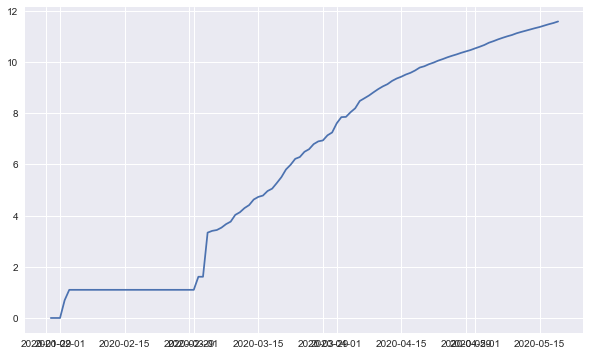

In [127]:
#ESTIMATING TREND

plt.plot(indexed_confirmed2_logscale)

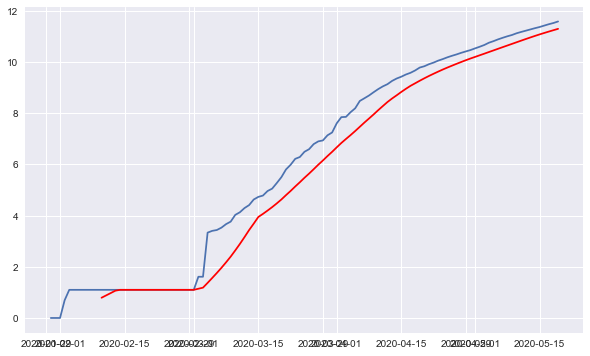

In [128]:
moving_avg = indexed_confirmed2_logscale.rolling(window = 12).mean()
moving_std = indexed_confirmed2_logscale.rolling(window = 12).std()
plt.plot(indexed_confirmed2_logscale)
plt.plot(moving_avg,color = 'red')


In [129]:
logscale_minus_avg = indexed_confirmed2_logscale - moving_avg
logscale_minus_avg.head(12)

#REMOVE NAN VALUES
logscale_minus_avg.dropna(inplace = True)
logscale_minus_avg.head(10)

confirms
date                    
2020-02-10  3.084418e-01
2020-02-11  2.168908e-01
2020-02-12  1.253398e-01
2020-02-13  3.378876e-02
2020-02-14  2.220446e-16
2020-02-15  2.220446e-16
2020-02-16  2.220446e-16
2020-02-17  2.220446e-16
2020-02-18  2.220446e-16
2020-02-19  2.220446e-16

In [130]:
from statsmodels.tsa.stattools import adfuller

def test_stationarity(timeseries):
    moving_avg = timeseries.rolling(window =12).mean()
    moving_std = timeseries.rolling(window =12).std()
    orig = plt.plot(timeseries , color = 'blue' ,label = 'original')
    mean = plt.plot(moving_avg , color = 'red' ,label = 'rolling mean')
    std = plt.plot(moving_std , color = 'black' ,label = 'rolling std')
    
    plt.legend(loc = "best")
    plt.title("rolling mean and standard deviation")
    plt.show(block = False)
    
    print("result of dickey fuller test : ")
    df_test = adfuller(timeseries["confirms"],autolag="AIC")
    df_output = pd.Series(df_test[0:4],index = ["test_statistic" , "p - value","#lag used", "no. of obs used"])
    for key , value in df_test[4].items():
        df_output["critical value(%s)"%key] = value
    print(df_output)
    
    

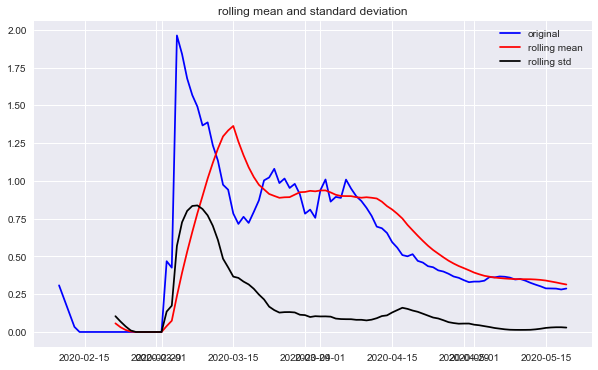

result of dickey fuller test : 
test_statistic         -2.431624
p - value               0.133009
#lag used               2.000000
no. of obs used        97.000000
critical value(1%)     -3.499637
critical value(5%)     -2.891831
critical value(10%)    -2.582928
dtype: float64


In [131]:
test_stationarity(logscale_minus_avg)

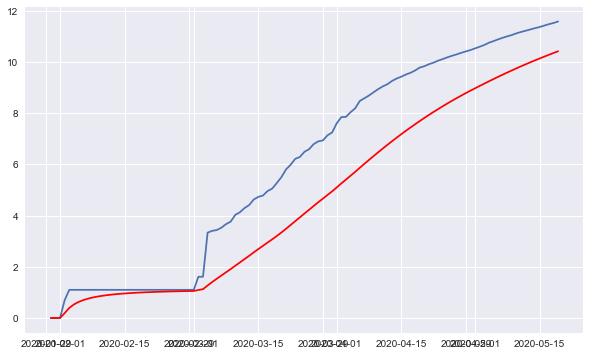

In [132]:
exponential_decay_weighted_avg = indexed_confirmed2_logscale.ewm(halflife = 12 , min_periods = 0 , adjust = True).mean()
plt.plot(indexed_confirmed2_logscale)
plt.plot(exponential_decay_weighted_avg , color = 'red')

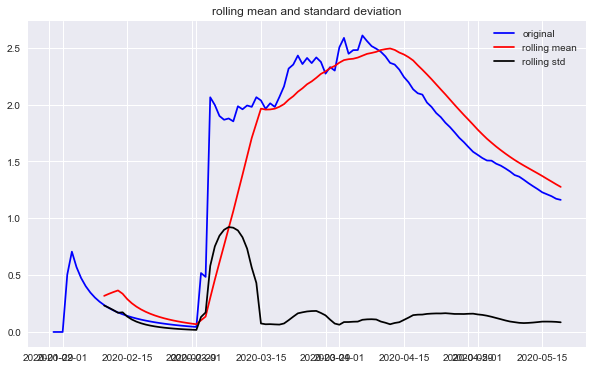

result of dickey fuller test : 
test_statistic          -1.761901
p - value                0.399534
#lag used                2.000000
no. of obs used        108.000000
critical value(1%)      -3.492401
critical value(5%)      -2.888697
critical value(10%)     -2.581255
dtype: float64


In [133]:
indexed_confirmed2_logscale_minus_exponential_decay_weighted_avg = indexed_confirmed2_logscale - exponential_decay_weighted_avg
indexed_confirmed2_logscale_minus_exponential_decay_weighted_avg.dropna(inplace = True)
test_stationarity(indexed_confirmed2_logscale_minus_exponential_decay_weighted_avg)

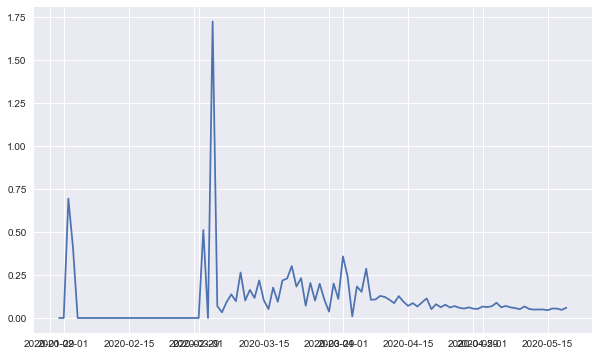

In [134]:
dataset_log_diff_shifting = indexed_confirmed2_logscale - indexed_confirmed2_logscale.shift()
plt.plot(dataset_log_diff_shifting)

In [135]:
dataset_log_diff_shifting.dropna(inplace = True)

In [136]:
dataset_log_diff_shifting.head()

confirms
date                
2020-01-30       inf
2020-01-31  0.000000
2020-02-01  0.000000
2020-02-02  0.693147
2020-02-03  0.405465

In [137]:
dataset_log_diff_shifting = dataset_log_diff_shifting.reset_index(drop = False)
dataset_log_diff_shifting = dataset_log_diff_shifting.drop(dataset_log_diff_shifting.index[[0]])

In [138]:
dataset_log_diff_shifting = dataset_log_diff_shifting.set_index('date')

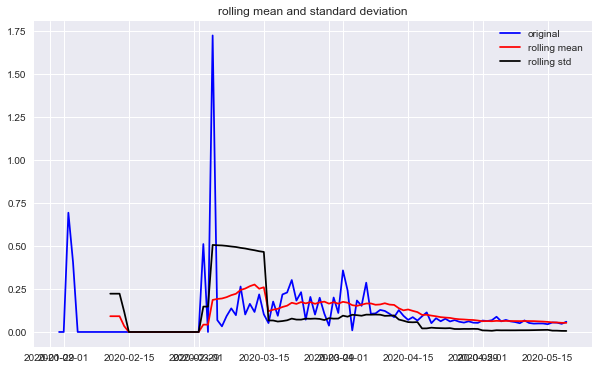

result of dickey fuller test : 
test_statistic        -5.822852e+00
p - value              4.143990e-07
#lag used              1.000000e+00
no. of obs used        1.080000e+02
critical value(1%)    -3.492401e+00
critical value(5%)    -2.888697e+00
critical value(10%)   -2.581255e+00
dtype: float64


In [139]:
test_stationarity(dataset_log_diff_shifting)

In [140]:
indexed_confirmed2_logscale = indexed_confirmed2_logscale.replace([np.inf, -np.inf], np.nan)

In [141]:
indexed_confirmed2_logscale = indexed_confirmed2_logscale.dropna()

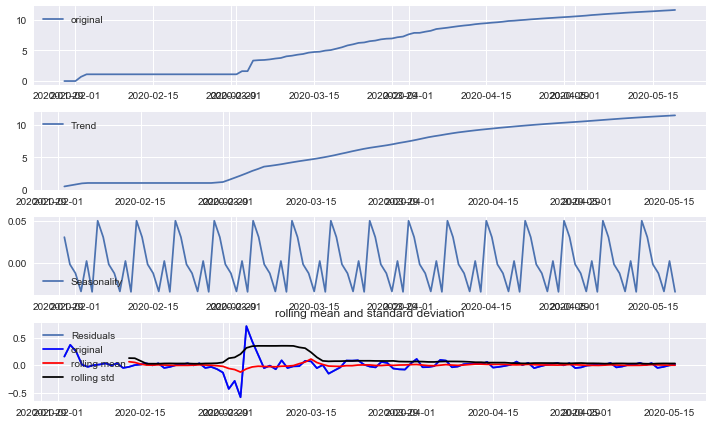

result of dickey fuller test : 
test_statistic        -8.354205e+00
p - value              2.939009e-13
#lag used              2.000000e+00
no. of obs used        1.020000e+02
critical value(1%)    -3.496149e+00
critical value(5%)    -2.890321e+00
critical value(10%)   -2.582122e+00
dtype: float64


In [142]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(indexed_confirmed2_logscale)
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(indexed_confirmed2_logscale , label = 'original')
plt.legend(loc = 'best')
plt.subplot(412)
plt.plot(trend , label = 'Trend')
plt.legend(loc = 'best')
plt.subplot(413)
plt.plot(seasonal, label = 'Seasonality')
plt.legend(loc = 'best')
plt.subplot(414)
plt.plot(residual , label = 'Residuals')
plt.legend(loc = 'best')
plt.tight_layout()

decomposed_logdata = residual
decomposed_logdata.dropna(inplace = True)
test_stationarity(decomposed_logdata)

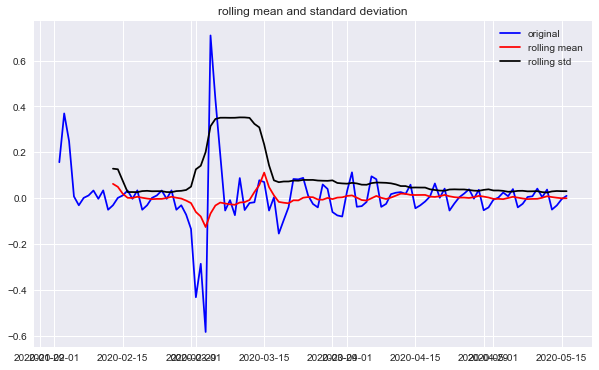

result of dickey fuller test : 
test_statistic        -8.354205e+00
p - value              2.939009e-13
#lag used              2.000000e+00
no. of obs used        1.020000e+02
critical value(1%)    -3.496149e+00
critical value(5%)    -2.890321e+00
critical value(10%)   -2.582122e+00
dtype: float64


In [143]:
decomposed_logdata = residual
decomposed_logdata.dropna(inplace = True)
test_stationarity(decomposed_logdata)

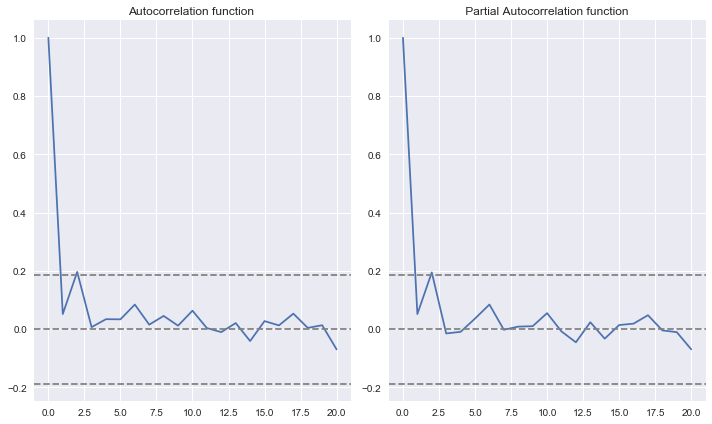

In [144]:
#ACF AND PACF PLOTS:

from statsmodels.tsa.stattools import acf,pacf
lag_acf = acf(dataset_log_diff_shifting ,nlags = 20)

lag_pacf = pacf(dataset_log_diff_shifting ,nlags = 20 , method = 'ols')

#plot ACF 
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y = 0 , linestyle = '--' , color = 'gray')

plt.axhline(y = -1.96/np.sqrt(len(dataset_log_diff_shifting)) , linestyle = '--' , color = 'gray')

plt.axhline(y = 1.96/np.sqrt(len(dataset_log_diff_shifting)) , linestyle = '--' , color = 'gray')

plt.title("Autocorrelation function ")


#plot PACF

plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y = 0 , linestyle = '--' , color = 'gray')

plt.axhline(y = -1.96/np.sqrt(len(dataset_log_diff_shifting)) , linestyle = '--' , color = 'gray')

plt.axhline(y = 1.96/np.sqrt(len(dataset_log_diff_shifting)) , linestyle = '--' , color = 'gray')

plt.title(" Partial Autocorrelation function ")
plt.tight_layout()



C:\Users\vivek sharma\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\Users\vivek sharma\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:191: FutureWarning:

Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.

C:\Users\vivek sharma\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



plotting AR model


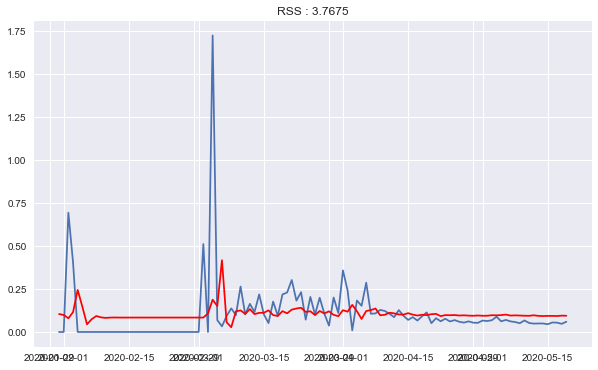

In [145]:
from statsmodels.tsa.arima_model import ARIMA
#AR model

model = ARIMA(indexed_confirmed2_logscale,order = (0,1,3))
results_AR = model.fit(disp=-1)
plt.plot(dataset_log_diff_shifting)
plt.plot(results_AR.fittedvalues , color = "red")
plt.title('RSS : %.4f'% sum((results_AR.fittedvalues - dataset_log_diff_shifting["confirms"])**2))
print("plotting AR model")


C:\Users\vivek sharma\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\Users\vivek sharma\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



plotting MA model


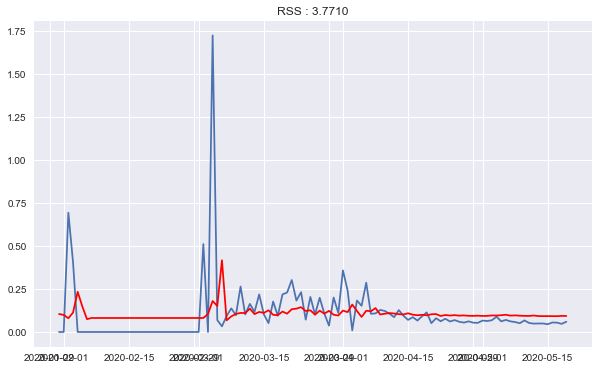

In [146]:
#MA model

model = ARIMA(indexed_confirmed2_logscale,order = (3,1,0))
results_MA = model.fit(disp=-1)
plt.plot(dataset_log_diff_shifting)
plt.plot(results_MA.fittedvalues , color = "red")
plt.title('RSS : %.4f'% sum((results_MA.fittedvalues - dataset_log_diff_shifting["confirms"])**2))
print("plotting MA model")


C:\Users\vivek sharma\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\Users\vivek sharma\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



plotting ARIMA model


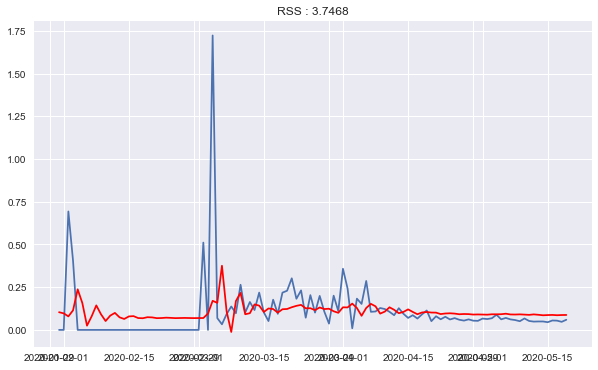

In [147]:
#ARIMA model

model = ARIMA(indexed_confirmed2_logscale,order = (3,1,3))
results_ARIMA = model.fit(disp=-1)
plt.plot(dataset_log_diff_shifting)
plt.plot(results_ARIMA.fittedvalues , color = "red")
plt.title('RSS : %.4f'% sum((results_ARIMA.fittedvalues - dataset_log_diff_shifting["confirms"])**2))
print("plotting ARIMA model")


In [148]:
predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues , copy = True)
print(predictions_ARIMA_diff.head())

date
2020-01-31    0.103524
2020-02-01    0.096747
2020-02-02    0.079048
2020-02-03    0.114384
2020-02-04    0.237344
dtype: float64


In [149]:
#convert to cumulative sum

predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
print(predictions_ARIMA_diff_cumsum.head())

date
2020-01-31    0.103524
2020-02-01    0.200271
2020-02-02    0.279318
2020-02-03    0.393702
2020-02-04    0.631046
dtype: float64


In [150]:
predictions_ARIMA_log = pd.Series(indexed_confirmed2_logscale["confirms"].ix[0], index = indexed_confirmed2_logscale.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum, fill_value = 0)
predictions_ARIMA_log.head()

C:\Users\vivek sharma\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning:


.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated



date
2020-01-30    0.000000
2020-01-31    0.103524
2020-02-01    0.200271
2020-02-02    0.279318
2020-02-03    0.393702
dtype: float64

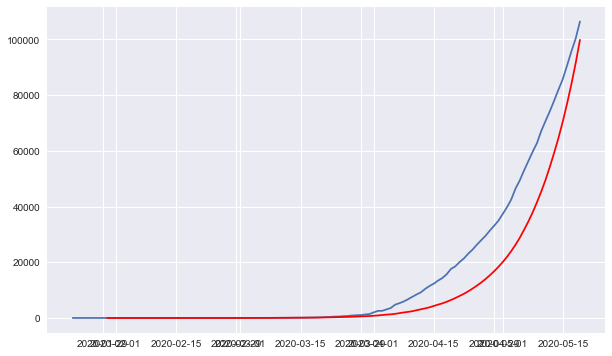

In [151]:
predictions_ARIMA = np.exp(predictions_ARIMA_log)
plt.plot(indexed_confirmed)
plt.plot(predictions_ARIMA , color = "red")

In [152]:
indexed_confirmed2_logscale

confirms
date                 
2020-01-30   0.000000
2020-01-31   0.000000
2020-02-01   0.000000
2020-02-02   0.693147
2020-02-03   1.098612
2020-02-04   1.098612
2020-02-05   1.098612
2020-02-06   1.098612
2020-02-07   1.098612
2020-02-08   1.098612
2020-02-09   1.098612
2020-02-10   1.098612
2020-02-11   1.098612
2020-02-12   1.098612
2020-02-13   1.098612
2020-02-14   1.098612
2020-02-15   1.098612
2020-02-16   1.098612
2020-02-17   1.098612
2020-02-18   1.098612
2020-02-19   1.098612
2020-02-20   1.098612
2020-02-21   1.098612
2020-02-22   1.098612
2020-02-23   1.098612
2020-02-24   1.098612
2020-02-25   1.098612
2020-02-26   1.098612
2020-02-27   1.098612
2020-02-28   1.098612
...               ...
2020-04-20   9.827632
2020-04-21   9.907480
2020-04-22   9.969743
2020-04-23  10.046592
2020-04-24  10.107652
2020-04-25  10.176678
2020-04-26  10.236023
2020-04-27  10.290483
2020-04-28  10.352140
2020-04-29  10.406140
2020-04-30  10.459181
2020-05-01  10.525595
2020-05-02  10.589081
2020-05-03  10.657377
2020-05-04  10.745852
2020-05-05  10.807706
2020-05-06  10.877802
2020-05-07  10.939355
2020-05-08  10.997004
2020-05-09  11.047838
2020-05-10  11.114848
2020-05-11  11.167162
2020-05-12  11.215759
2020-05-13  11.265169
2020-05-14  11.314438
2020-05-15  11.359588
2020-05-16  11.414739
2020-05-17  11.468953
2020-05-18  11.516200
2020-05-19  11.575665

[111 rows x 1 columns]

# FINAL PREDICTION FOR THE FUTURE

C:\Users\vivek sharma\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:320: FutureWarning:

Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.



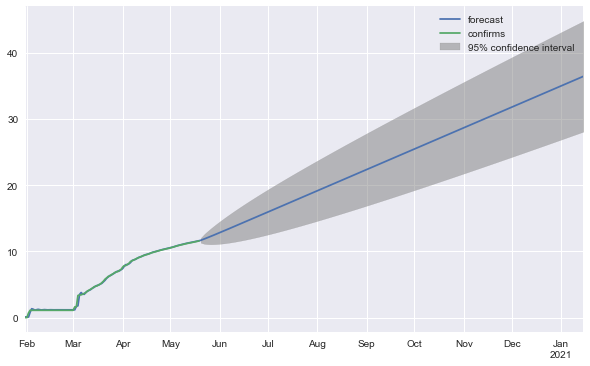

In [153]:
results_ARIMA.plot_predict(1,351)
x = results_ARIMA.forecast(steps = 240)


In [154]:
x

(array([11.66157334, 11.75089978, 11.84671546, 11.94241159, 12.03713386,
        12.13380526, 12.23220194, 12.33079232, 12.42971014, 12.52949853,
        12.62989093, 12.73055559, 12.8315613 , 12.93296682, 13.03465721,
        13.1365552 , 13.23866793, 13.34098117, 13.44345072, 13.54605196,
        13.64877645, 13.75160874, 13.85453046, 13.95753009, 14.06059934,
        14.1637287 , 14.26690944, 14.37013508, 14.4734001 , 14.57669913,
        14.68002758, 14.78338169, 14.88675813, 14.99015392, 15.09356651,
        15.19699372, 15.30043362, 15.40388455, 15.50734505, 15.61081387,
        15.71428992, 15.81777225, 15.92126003, 16.02475255, 16.12824919,
        16.23174941, 16.33525273, 16.43875875, 16.54226711, 16.64577751,
        16.74928968, 16.85280339, 16.95631843, 17.05983463, 17.16335184,
        17.26686992, 17.37038877, 17.47390827, 17.57742835, 17.68094893,
        17.78446994, 17.88799133, 17.99151304, 18.09503504, 18.19855728,
        18.30207974, 18.40560238, 18.50912519, 18.6